<a href="https://colab.research.google.com/github/jkeza1/Group7_water-quality-model/blob/main/Keza_Joan_of_formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
#LOAD THE DATA
data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


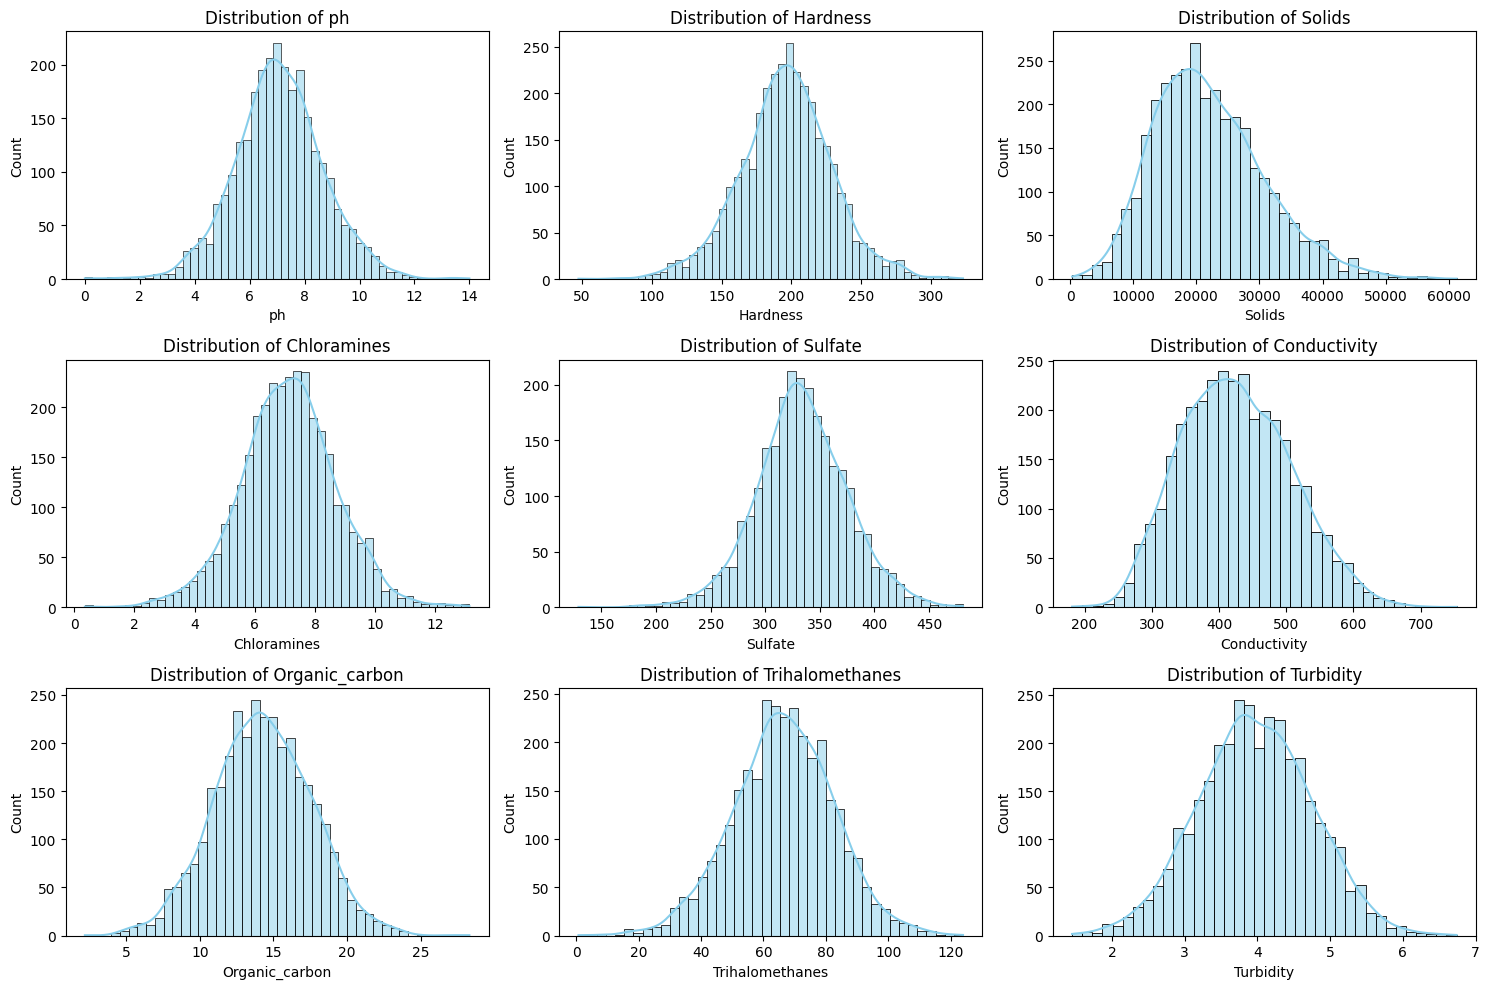

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [ ]:
# --- Data Preprocessing ---
data = data.interpolate(inplace=False).bfill().ffill()

X = data.drop('Potability', axis=1)
y = data['Potability']

In [ ]:
class_counts = data['Potability'].value_counts()

print("Class distribution:")
print(class_counts)

Class distribution:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [ ]:
#from sklearn import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Each Member Defines their model Here

In [ ]:
def excel_water_quality_model(input_dim):
    model = Sequential([
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005), input_shape=(input_dim,)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Start the training Process

In [ ]:
model = excel_water_quality_model(X_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adagrad(learning_rate=0.01)

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    min_delta=0.005,
    restore_best_weights=True
)

In [ ]:
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}

# Then train with the weights
history = model.fit(X_train, y_train,
                    epochs=1000,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop],
                    class_weight=class_weights)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5187 - loss: 2.2356 - val_accuracy: 0.5336 - val_loss: 2.2092
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5240 - loss: 2.1985 - val_accuracy: 0.5356 - val_loss: 2.1719
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5332 - loss: 2.1589 - val_accuracy: 0.5397 - val_loss: 2.1375
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5363 - loss: 2.1312 - val_accuracy: 0.5397 - val_loss: 2.1032
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5353 - loss: 2.0992 - val_accuracy: 0.5479 - val_loss: 2.0703
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5425 - loss: 2.0647 - val_accuracy: 0.5479 - val_loss: 2.0379
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5434 - loss: 2.0252 - val_accuracy: 0.5418 - val_loss: 2.0073
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5489 - loss: 1.9922 - val_accuracy: 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5713 - loss: 2.0588 


In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)
print(report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.66      0.60      0.62       307
           1       0.42      0.48      0.45       185

    accuracy                           0.55       492
   macro avg       0.54      0.54      0.54       492
weighted avg       0.57      0.55      0.56       492



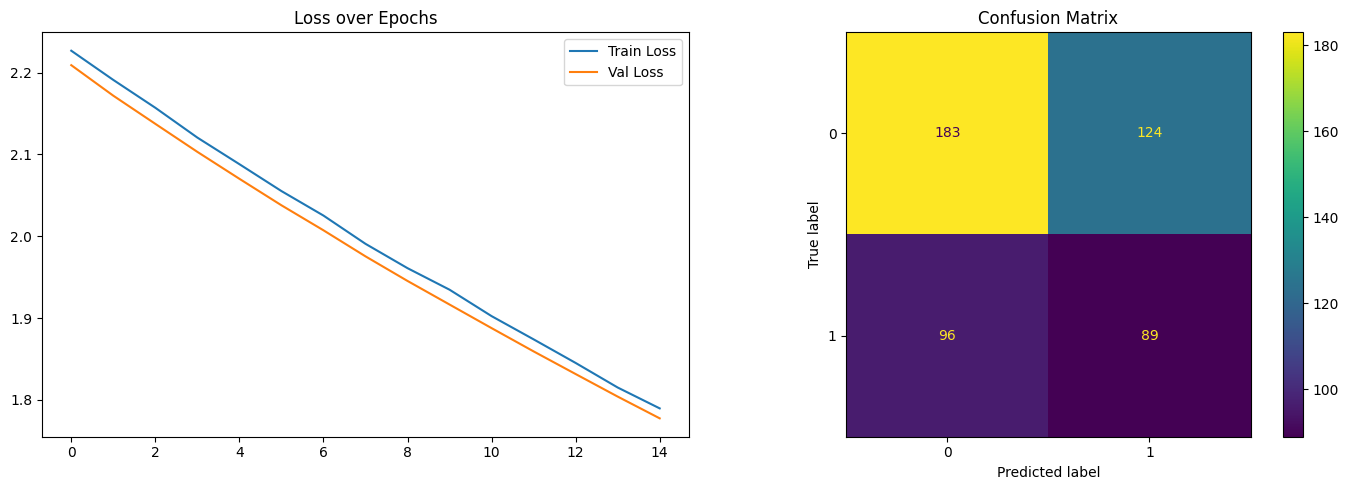

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Val Loss')
axs[0].set_title('Loss over Epochs')
axs[0].legend()

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,996 (19.52 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,499 (9.77 KB)